In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


df= pd.read_csv("../csv/nyc_all_parks_filtered.csv")




FileNotFoundError: [Errno 2] No such file or directory: '../csv/nyc_all_parks_filtered.csv'

In [ ]:
df.shape

(18802, 9)

In [ ]:
df.info

<bound method DataFrame.info of              date        borough                                  location  \
0      2002-06-25      Manhattan  Constance Baker Motley Recreation Center   
1      2002-06-25      Manhattan            Pelham Fritz Recreation Center   
2      2002-06-29      Manhattan                                White Park   
3      2002-06-30      Manhattan                   Bloomingdale Playground   
4      2002-07-02      Manhattan                Abraham Lincoln Playground   
...           ...            ...                                       ...   
18797  2024-12-07         Queens              Al Oerter  Recreation Center   
18798  2024-12-07      Manhattan         Alfred E. Smith Recreation Center   
18799  2024-12-08      Manhattan                 Chelsea Recreation Center   
18800  2024-12-08      Manhattan            Pelham Fritz Recreation Center   
18801  2024-12-09  Staten Island             Ocean Breeze Athletic Complex   

                  event_type   

In [ ]:
df.describe()

,attendance
count,18656.000000
mean,95.027819
std,296.508019
min,-42.000000
25%,8.000000
50%,25.000000
75%,76.000000
max,7995.000000


In [ ]:
# list all columns in my dataset
df.columns.tolist()

['date',
 'borough',
 'location',
 'event_type',
 'category',
 'attendance',
 'audience',
 'classification',
 'time']

In [ ]:
df.isnull().sum()

date                 0
borough              0
location             0
event_type        7039
category            24
attendance         146
audience          7039
classification    3123
time                 0
dtype: int64

In [ ]:
#Drop all nulls, want to 
data_cleaned = df.dropna()


In [ ]:
print(data_cleaned)


             date        borough  \
5      2017-01-06          Bronx   
6      2017-01-06          Bronx   
7      2017-01-13          Bronx   
8      2017-01-13          Bronx   
11     2017-01-28          Bronx   
...           ...            ...   
18182  2024-08-21          Bronx   
18425  2024-09-21  Staten Island   
18521  2024-10-10      Manhattan   
18588  2024-10-19       Brooklyn   
18592  2024-10-23          Bronx   

                                                location  \
5                           Owen Dolen Recreation Center   
6                           Owen Dolen Recreation Center   
7                           Owen Dolen Recreation Center   
8                           Owen Dolen Recreation Center   
11                          St. Mary's Recreation Center   
...                                                  ...   
18182                           Williamsbridge Oval Park   
18425  Franklin D. Roosevelt Boardwalk and Beach, Sou...   
18521                      

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_10492/717393977.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=event_counts, x="borough", y="event_type", palette="viridis")


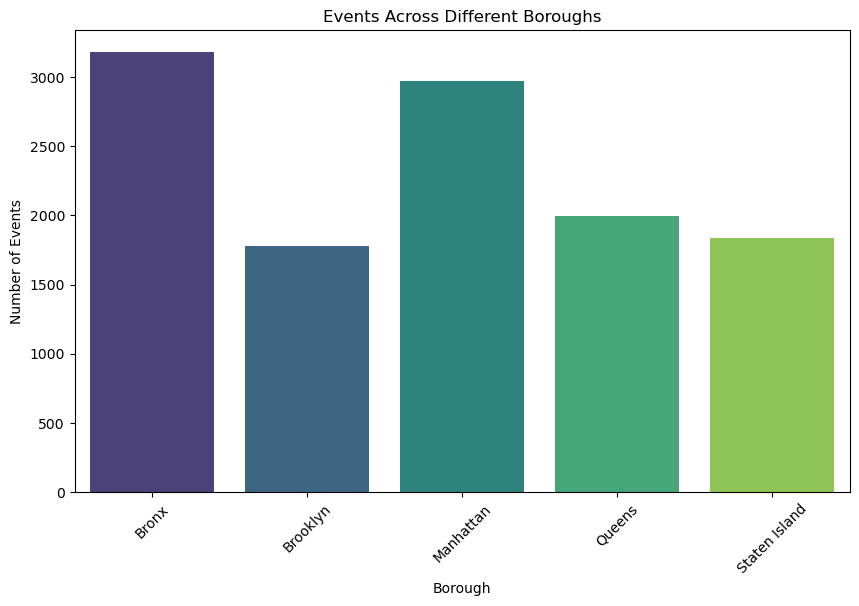

In [ ]:

#sorted_df = data_cleaned.sort_values(by="event_type", ascending= False)

event_counts = df.groupby("borough")["event_type"].count().reset_index() 

# swap out attendents and use count of event_type as y-axis

plt.figure(figsize=(10, 6))

# Count the number of events per borough
event_counts = df.groupby("borough")["event_type"].count().reset_index()

# Plot
sns.barplot(data=event_counts, x="borough", y="event_type", palette="viridis")

plt.xticks(rotation=45)  
plt.title("Events Across Different Boroughs")
plt.xlabel("Borough")
plt.ylabel("Number of Events")
plt.show()


In [ ]:


event_counts = df.groupby("borough")["event_type"].count().reset_index() 

# swap out attendents and use count of event_type as y-axis

plt.figure(figsize=(10, 6))

# Count the number of events per borough
event_counts = df.groupby("borough")["event_type"].count().reset_index()

# Plot
sns.barplot(data=event_counts, x="borough", y="event_type", palette="viridis")

plt.xticks(rotation=45)  
plt.title("Events Across Different Boroughs")
plt.xlabel("Borough")
plt.ylabel("Number of Events")
plt.show()


    * How does the event distribution vary across different boroughs?

In [ ]:
event_count = df["event_type"].value_counts()

df= pd.read_csv("../csv/nyc_all_parks_filtered.csv")


df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year






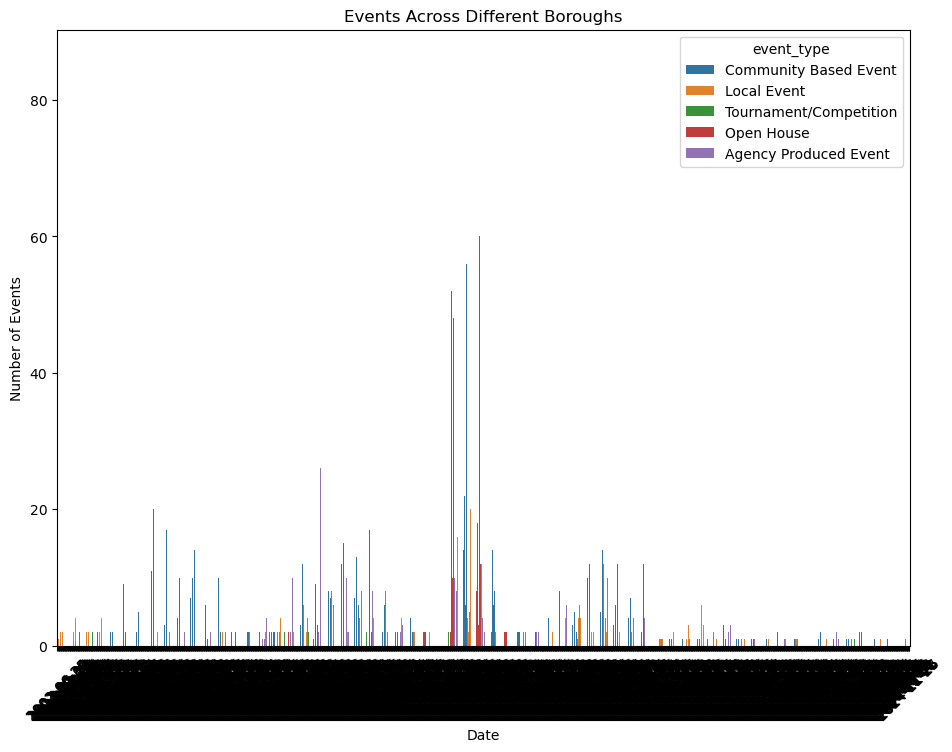

In [3]:
df = pd.read_csv("/Users/sa19/Desktop/Phase-1-Portfolio-Project/csv/nyc_all_parks_filtered.csv")

# Group by date and event_type, then count occurrences
event_counts = df.groupby(['date', 'event_type']).size().reset_index(name='event_count')

# Plot
plt.figure(figsize=(11, 8))
sns.barplot(data=event_counts, x="date", y="event_count", hue="event_type")

# Customize plot
plt.xticks(rotation=45)
plt.title("Events Across Different Boroughs")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.show()

    * Are there seasonal trends in event attendance?